## manipulacion y pulido de datos para SCORING (PIN)

### importar los datos y analizar su contenido.

In [ ]:
# pip install numpy

In [1]:
import pandas as pd


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_csv('/content/drive/MyDrive/pin-ds2023/dataset_curso.csv')


In [5]:
df.head()

,idPersona,sexo,fechanacimiento,max_fecha,tipoCliente,tipoMora,figuraEnBoletin,situacionBCRA,CantidadCreditos,deuda,ingreso_mensual_interno,ingreso_mensual_afip,ingreso_mensual_total,monotributo,categoria
0,49,MASCULINO,1948-07-15,2021-03-04,R,BPG,0,1.0,6,0.0,0.0,0.0,0.0,NaN,RECIBO
1,65,FEMENINO,2001-01-01,2023-02-10,R,BPG,0,1.0,21,0.0,184404.0,0.0,184404.0,NaN,RECIBO
2,74,FEMENINO,1961-03-04,2022-08-02,R,BPG,0,1.0,5,0.0,68250.0,0.0,68250.0,AL,JUBILADO
3,196,MASCULINO,1972-06-24,2021-09-13,R,BPG,0,1.0,40,0.0,8125.0,0.0,8125.0,NaN,RECIBO
4,537,MASCULINO,1962-09-10,2021-11-04,R,BPG,0,1.0,24,0.0,16282.0,0.0,16282.0,NaN,RECIBO


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220959 entries, 0 to 220958
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   idPersona                220959 non-null  int64  
 1   sexo                     220959 non-null  object 
 2   fechanacimiento          220400 non-null  object 
 3   max_fecha                220959 non-null  object 
 4   tipoCliente              220959 non-null  object 
 5   tipoMora                 220959 non-null  object 
 6   figuraEnBoletin          220959 non-null  int64  
 7   situacionBCRA            160777 non-null  float64
 8   CantidadCreditos         220959 non-null  int64  
 9   deuda                    220959 non-null  float64
 10  ingreso_mensual_interno  220959 non-null  float64
 11  ingreso_mensual_afip     220959 non-null  float64
 12  ingreso_mensual_total    220959 non-null  float64
 13  monotributo              29522 non-null   object 
 14  cate

### elimina la columna idPersona de la lista.

In [ ]:
# df= df.drop(['idPersona'],axis=1)

In [ ]:
#df.info()

In [ ]:
# df.head()

## Analizar el contenido de los campos

### Sexo
'sexo': MASCULINO / FEMENINO / GENERICO


In [ ]:
df['sexo'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 220959 entries, 0 to 220958
Series name: sexo
Non-Null Count   Dtype 
--------------   ----- 
220959 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [ ]:
df['sexo'].unique()

array(['MASCULINO', 'FEMENINO', 'GENERICO'], dtype=object)

### Monotributo

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220959 entries, 0 to 220958
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   idPersona                220959 non-null  int64  
 1   sexo                     220959 non-null  object 
 2   fechanacimiento          220400 non-null  object 
 3   max_fecha                220959 non-null  object 
 4   tipoCliente              220959 non-null  object 
 5   tipoMora                 220959 non-null  object 
 6   figuraEnBoletin          220959 non-null  int64  
 7   situacionBCRA            160777 non-null  float64
 8   CantidadCreditos         220959 non-null  int64  
 9   deuda                    220959 non-null  float64
 10  ingreso_mensual_interno  220959 non-null  float64
 11  ingreso_mensual_afip     220959 non-null  float64
 12  ingreso_mensual_total    220959 non-null  float64
 13  monotributo              29522 non-null   object 
 14  cate

In [8]:
df['monotributo'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 220959 entries, 0 to 220958
Series name: monotributo
Non-Null Count  Dtype 
--------------  ----- 
29522 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [10]:
df['monotributo'].unique()

array([nan, 'AL', 'A', 'AV', 'B', 'D', 'G', 'C', 'AT', 'AC', 'E', 'AP',
       'F', 'J', 'I', 'H', 'K'], dtype=object)

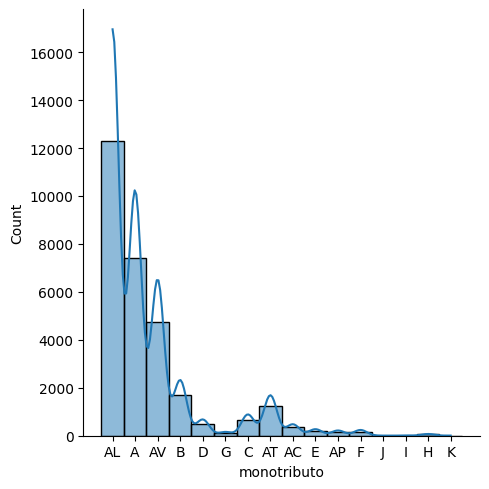

In [16]:
sns.displot(df['monotributo'],kde=True)
plt.show()


### Fecha de nacimiento -> Edad

In [ ]:
from datetime import datetime

In [ ]:
fecha_actual = datetime.now()

In [ ]:
filtro = (df['fechanacimiento'].notna())

In [ ]:
df['fechanacimiento']=pd.to_datetime(df.loc[filtro, 'fechanacimiento'],errors = 'coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220959 entries, 0 to 220958
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   idPersona                220959 non-null  int64         
 1   sexo                     220959 non-null  object        
 2   fechanacimiento          220214 non-null  datetime64[ns]
 3   max_fecha                220959 non-null  object        
 4   tipoCliente              220959 non-null  object        
 5   tipoMora                 220959 non-null  object        
 6   figuraEnBoletin          220959 non-null  int64         
 7   situacionBCRA            160777 non-null  float64       
 8   CantidadCreditos         220959 non-null  int64         
 9   deuda                    220959 non-null  float64       
 10  ingreso_mensual_interno  220959 non-null  float64       
 11  ingreso_mensual_afip     220959 non-null  float64       
 12  ingreso_mensual_

In [ ]:
fecha_actual = datetime.now()

In [ ]:
df['edad']=0

In [ ]:
filtro = (df['fechanacimiento'].isna()) | (df['fechanacimiento'] < fecha_actual)

In [ ]:
df.loc[filtro, 'edad'] = (fecha_actual.year - df.loc[filtro, 'fechanacimiento'].dt.year)

In [ ]:
df['edad'].describe()

count    220214.000000
mean         41.226516
std          16.215955
min           0.000000
25%          28.000000
50%          38.000000
75%          52.000000
max         338.000000
Name: edad, dtype: float64

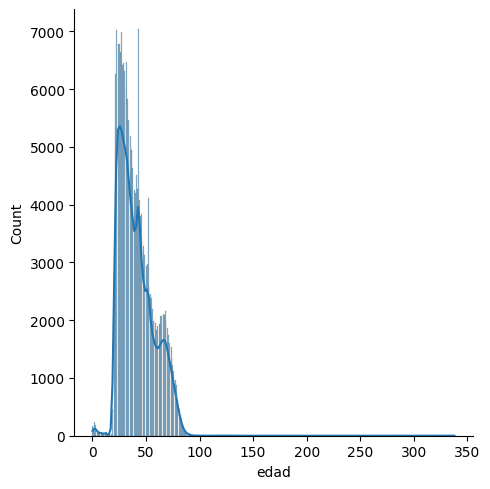

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(11,7))
sns.displot(df['edad'],kde=True)
plt.show()


In [ ]:
df[(df['edad']>100) | (df['edad']<16)].count()

idPersona                  1364
sexo                       1364
fechanacimiento            1364
max_fecha                  1364
tipoCliente                1364
tipoMora                   1364
figuraEnBoletin            1364
situacionBCRA               965
CantidadCreditos           1364
deuda                      1364
ingreso_mensual_interno    1364
ingreso_mensual_afip       1364
ingreso_mensual_total      1364
monotributo                 157
categoria                  1364
edad                       1364
dtype: int64

In [ ]:
df1=df[(df['edad']<100) & (df['edad']>16)]

In [ ]:
df1['edad'].describe()

count    218845.000000
mean         41.399415
std          15.782292
min          17.000000
25%          28.000000
50%          38.000000
75%          52.000000
max          98.000000
Name: edad, dtype: float64

In [ ]:
df_zscore = (df1['edad'] - df1.edad.mean())/df1.edad.std()

In [ ]:
df_zscore.describe()

count    2.188450e+05
mean     1.948071e-16
std      1.000000e+00
min     -1.545999e+00
25%     -8.490158e-01
50%     -2.153943e-01
75%      6.716759e-01
max      3.586335e+00
Name: edad, dtype: float64

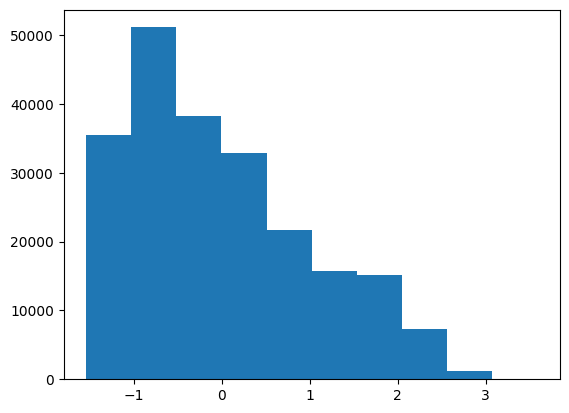

In [ ]:
plt.hist(df_zscore)
plt.show()

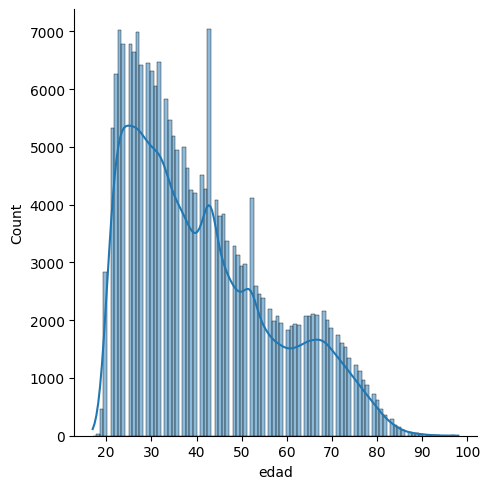

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(11,7))
sns.displot(df1['edad'],kde=True)
plt.show()

In [ ]:
df=df1

### max_fecha -> dias_ultimo_credito
calcular los dias existentes desde el ultimo credito otorgado
'max_fecha': fecha del último crédito otorgado


In [ ]:
df['max_fecha'].describe()

count         218845
unique          1087
top       2021-12-24
freq            1069
Name: max_fecha, dtype: object

In [ ]:
df['max_fecha']=pd.to_datetime(df['max_fecha'],errors = 'coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218845 entries, 0 to 220958
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   idPersona                218845 non-null  int64         
 1   sexo                     218845 non-null  object        
 2   fechanacimiento          218845 non-null  datetime64[ns]
 3   max_fecha                218845 non-null  datetime64[ns]
 4   tipoCliente              218845 non-null  object        
 5   tipoMora                 218845 non-null  object        
 6   figuraEnBoletin          218845 non-null  int64         
 7   situacionBCRA            159281 non-null  float64       
 8   CantidadCreditos         218845 non-null  int64         
 9   deuda                    218845 non-null  float64       
 10  ingreso_mensual_interno  218845 non-null  float64       
 11  ingreso_mensual_afip     218845 non-null  float64       
 12  ingreso_mensual_

In [ ]:
df['dias_ultimo_credito']=0

In [ ]:
fecha_actual = datetime.now()

In [ ]:
df['dias_ultimo_credito']=np.floor((datetime.now() - df['max_fecha']).dt.days).astype(int)

In [ ]:
df['dias_ultimo_credito'].describe()

count    218845.000000
mean        510.123558
std         290.763264
min          57.000000
25%         251.000000
50%         502.000000
75%         720.000000
max        1154.000000
Name: dias_ultimo_credito, dtype: float64

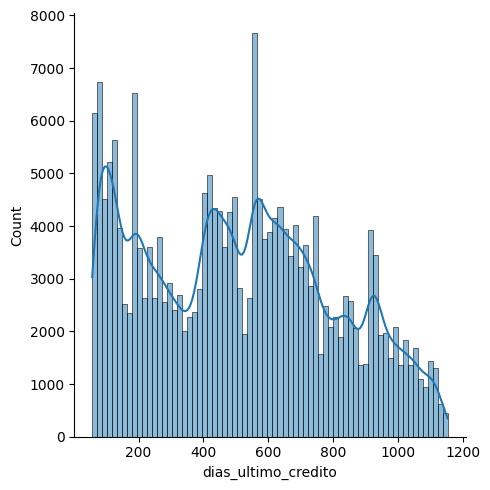

In [ ]:
sns.displot(df['dias_ultimo_credito'],kde=True)
plt.show()

In [ ]:
df_zscore = (df['dias_ultimo_credito'] - df.dias_ultimo_credito.mean())/df.dias_ultimo_credito.std()


In [ ]:
df_zscore.describe()

count    2.188450e+05
mean     1.163648e-16
std      1.000000e+00
min     -1.558393e+00
25%     -8.911840e-01
50%     -2.793873e-02
75%      7.218121e-01
max      2.214435e+00
Name: dias_ultimo_credito, dtype: float64

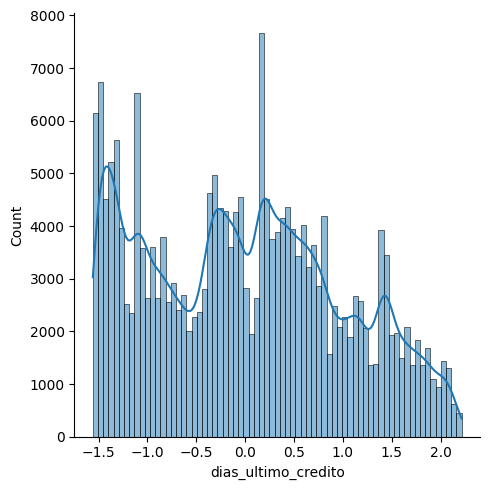

In [ ]:
sns.displot(df_zscore,kde=True)
plt.show()

In [ ]:
df= df.drop(['fechanacimiento'],axis=1)

In [ ]:
df= df.drop(['max_fecha'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218845 entries, 0 to 220958
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   idPersona                218845 non-null  int64  
 1   sexo                     218845 non-null  object 
 2   tipoCliente              218845 non-null  object 
 3   tipoMora                 218845 non-null  object 
 4   figuraEnBoletin          218845 non-null  int64  
 5   situacionBCRA            159281 non-null  float64
 6   CantidadCreditos         218845 non-null  int64  
 7   deuda                    218845 non-null  float64
 8   ingreso_mensual_interno  218845 non-null  float64
 9   ingreso_mensual_afip     218845 non-null  float64
 10  ingreso_mensual_total    218845 non-null  float64
 11  monotributo              29244 non-null   object 
 12  categoria                218845 non-null  object 
 13  edad                     218845 non-null  float64
 14  dias

### Moroso.
 prepara el set de datos para marcar el campo como moroso (0=No / 1= si)

In [ ]:
df["moroso"]=0

In [ ]:
df[df["tipoMora"]=='M30']

,idPersona,sexo,tipoCliente,tipoMora,figuraEnBoletin,situacionBCRA,CantidadCreditos,deuda,ingreso_mensual_interno,ingreso_mensual_afip,ingreso_mensual_total,monotributo,categoria,edad,dias_ultimo_credito,moroso
41,2275,FEMENINO,R,M30,1,3.0,8,7460.0,91000.0,0.0,91000.0,NaN,JUBILADO,78.0,137,0
49,2638,MASCULINO,R,M30,0,2.0,3,44130.0,138624.0,0.0,138624.0,NaN,RECIBO,40.0,162,0
256,13184,FEMENINO,R,M30,0,1.0,57,12180.0,14842.0,0.0,14842.0,NaN,JUBILADO,78.0,241,0
427,22586,FEMENINO,R,M30,0,1.0,4,6110.0,95658.0,0.0,95658.0,NaN,JUBILADO,68.0,321,0
655,34666,MASCULINO,R,M30,0,NaN,8,21150.0,37917.0,0.0,37917.0,NaN,RECIBO,49.0,125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216834,1679207,FEMENINO,N,M30,0,2.0,1,20950.0,78000.0,0.0,78000.0,NaN,RECIBO,49.0,113,0
216882,1679308,FEMENINO,N,M30,0,3.0,1,1020.0,78000.0,0.0,78000.0,AL,MONOTRIBUTISTA,53.0,112,0
217129,1679854,MASCULINO,N,M30,0,1.0,1,14280.0,49292.0,0.0,49292.0,NaN,JUBILADO,66.0,108,0
217130,1679856,FEMENINO,N,M30,0,1.0,1,25720.0,91356.0,0.0,91356.0,NaN,RECIBO,45.0,108,0


In [ ]:
df.loc[(df['tipoMora'] =='M60') | (df['tipoMora']=='M90') | (df['tipoMora'] =='M30') | (df['tipoMora'] =='M12') | (df['tipoMora'] =='M18') | (df['tipoMora'] =='MPE')
, 'moroso'] = 1

In [ ]:
df['moroso']=np.where((df.situacionBCRA==1)&((df.tipoMora=='BPG')|(df.tipoMora=='MTP')|(df.tipoMora=='M30'))&(df.figuraEnBoletin==0),0,1)#&(data.tipoMora=='MTP')

In [ ]:
df[df['tipoMora']=='M30']['moroso']

41        1
49        1
256       0
427       0
655       1
         ..
216834    1
216882    1
217129    0
217130    0
217192    0
Name: moroso, Length: 2146, dtype: int64

### tipoMora

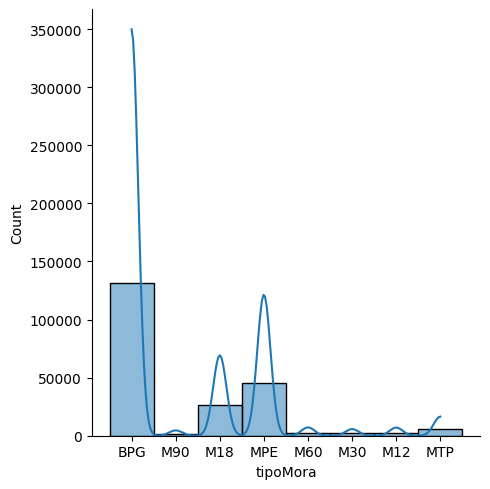

In [ ]:
sns.displot(data=df,x='tipoMora',kde=True)
plt.show()

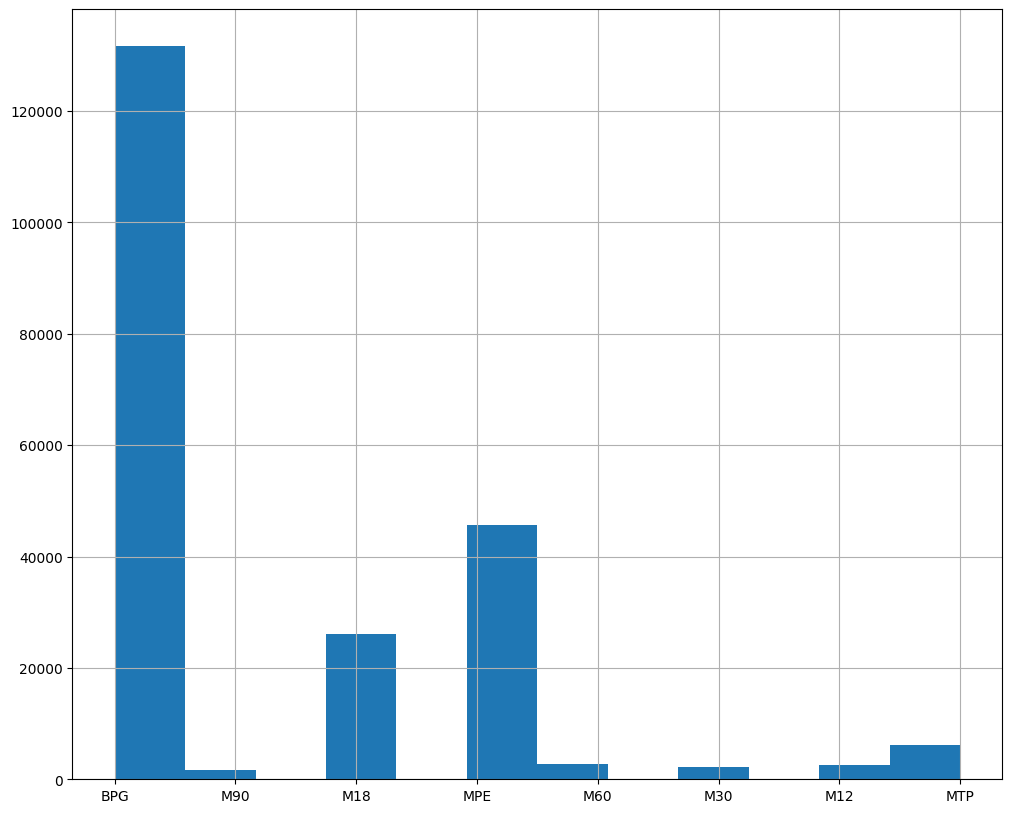

In [ ]:
df['tipoMora'].hist(bins=12, figsize=(12,10))
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218845 entries, 0 to 220958
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   idPersona                218845 non-null  int64  
 1   sexo                     218845 non-null  object 
 2   tipoCliente              218845 non-null  object 
 3   tipoMora                 218845 non-null  object 
 4   figuraEnBoletin          218845 non-null  int64  
 5   situacionBCRA            159281 non-null  float64
 6   CantidadCreditos         218845 non-null  int64  
 7   deuda                    218845 non-null  float64
 8   ingreso_mensual_interno  218845 non-null  float64
 9   ingreso_mensual_afip     218845 non-null  float64
 10  ingreso_mensual_total    218845 non-null  float64
 11  monotributo              29244 non-null   object 
 12  categoria                218845 non-null  object 
 13  edad                     218845 non-null  float64
 14  dias

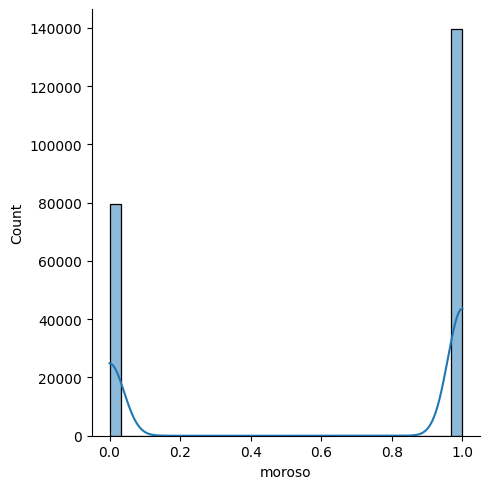

In [ ]:
sns.displot(data=df,x='moroso',kde=True)
plt.show()

### ingreso_mensual_total
Carga el ingreso mensual de cat. A en Monotributo por subclasificacion.
> AC =(ASOCIADO A COOPERATIVA) ->  Cat. A
> AL =(MONOTRIBUTO SOCIAL LOCACION)
> AP =(ACTIVIDAD PRIMARIA) -> Cat. A
> AT =(TRABAJADOR PROMOVIDO) - Cat. A
> AV =(MONOTRIBUTO SOCIAL VENTAS)

  **Monotributistas sociales **>: trabajadores de bajos ingresos inscriptos en el
> Régimen de Monotributo Social (Clasificadas en el padrón de AFIP como
> Monotributista Social Agropecuario, Monotributo Social Locación y Monotributo
> Social Ventas), que desarrollan actividades económicas en forma independiente.

In [ ]:
df.loc[(df['monotributo'] =='AC') | (df['monotributo']=='AP') | (df['monotributo'] =='AL') | (df['monotributo'] =='AT') | (df['monotributo'] =='AV')
      ,'ingreso_mensual_afip']=83305.0


In [ ]:
df['ingreso_mensual_total'].describe()

count    2.188450e+05
mean     3.987918e+04
std      2.755292e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.397500e+04
75%      5.207300e+04
max      4.698085e+07
Name: ingreso_mensual_total, dtype: float64

### tipoCliente
'tipoCliente': N / R
    N: nuevo, no canceló ningún crédito previamente
    R: renovador, al menos 1 crédito cancelado


In [ ]:
df['tipoCliente'].unique()

array(['R', 'N'], dtype=object)

### deuda
'deuda': monto adeudado por el cliente con la empresa.


In [ ]:
df['deuda'].info()

<class 'pandas.core.series.Series'>
Int64Index: 218845 entries, 0 to 220958
Series name: deuda
Non-Null Count   Dtype  
--------------   -----  
218845 non-null  float64
dtypes: float64(1)
memory usage: 11.4 MB


In [ ]:
df['deuda'].describe()

count    2.188450e+05
mean     3.090392e+04
std      5.631275e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.761000e+04
max      1.025250e+06
Name: deuda, dtype: float64

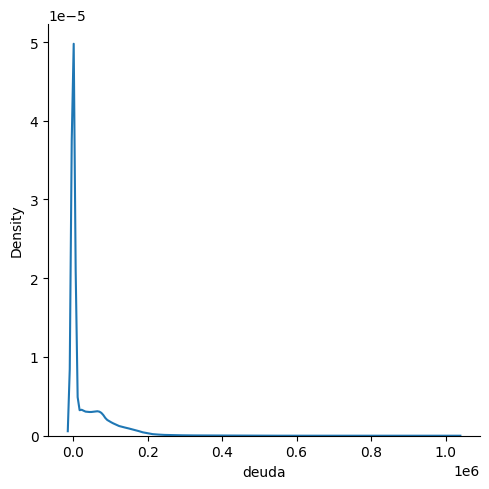

In [ ]:
sns.displot(df,x='deuda',kind='kde')

In [ ]:
df[df['deuda']>0].count()/df.count()

idPersona                  0.380287
sexo                       0.380287
tipoCliente                0.380287
tipoMora                   0.380287
figuraEnBoletin            0.380287
situacionBCRA              0.366949
CantidadCreditos           0.380287
deuda                      0.380287
ingreso_mensual_interno    0.380287
ingreso_mensual_afip       0.380287
ingreso_mensual_total      0.380287
monotributo                0.341232
categoria                  0.380287
edad                       0.380287
dias_ultimo_credito        0.380287
moroso                     0.380287
dtype: float64

### CantidadCreditos su distribucion.
'CantidadCreditos': cantidad de créditos otorgados al cliente por la empresa


In [ ]:
df['CantidadCreditos'].describe()

count    218845.000000
mean          6.934725
std          11.670190
min           0.000000
25%           1.000000
50%           3.000000
75%           7.000000
max         333.000000
Name: CantidadCreditos, dtype: float64

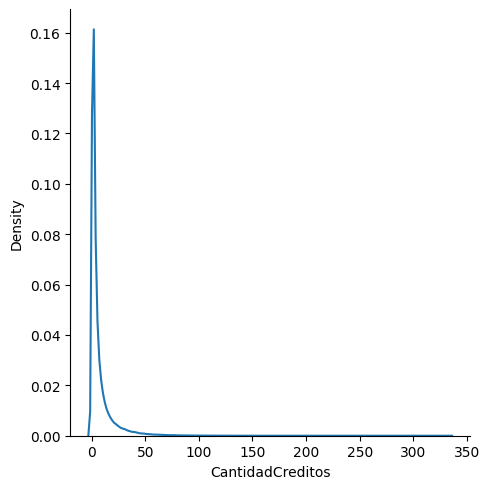

In [ ]:
sns.displot(df['CantidadCreditos'],kind='kde')

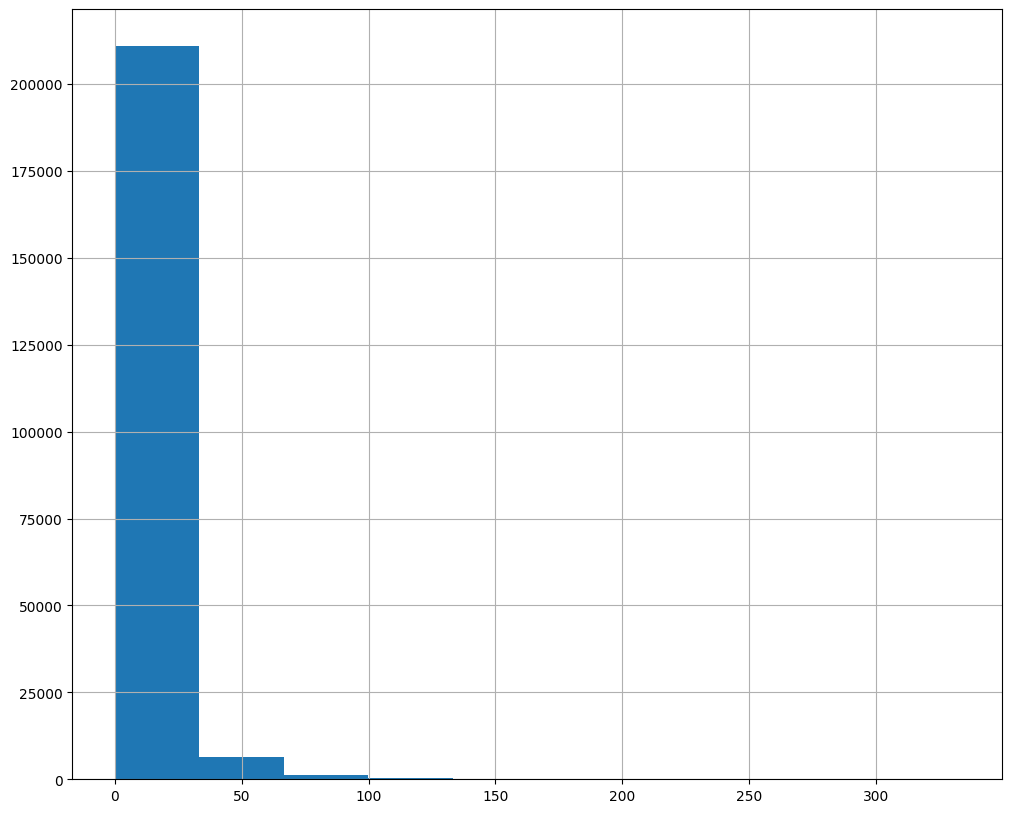

In [ ]:
df['CantidadCreditos'].hist(bins=10, figsize=(12,10))
plt.show()

In [ ]:
df[df['CantidadCreditos']>50].count()

idPersona                  3125
sexo                       3125
tipoCliente                3125
tipoMora                   3125
figuraEnBoletin            3125
situacionBCRA              2331
CantidadCreditos           3125
deuda                      3125
ingreso_mensual_interno    3125
ingreso_mensual_afip       3125
ingreso_mensual_total      3125
monotributo                 725
categoria                  3125
edad                       3125
dias_ultimo_credito        3125
moroso                     3125
dtype: int64

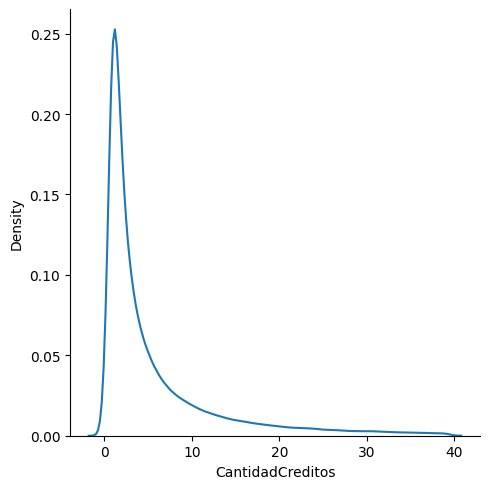

In [ ]:
sns.displot(df[df['CantidadCreditos']<40],x='CantidadCreditos',kind='kde')

In [18]:
sns.displot(df[df['CantidadCreditos']<50],x='edad',kind='kde')

ValueError: ignored

In [ ]:
df=df[df['CantidadCreditos']<50]

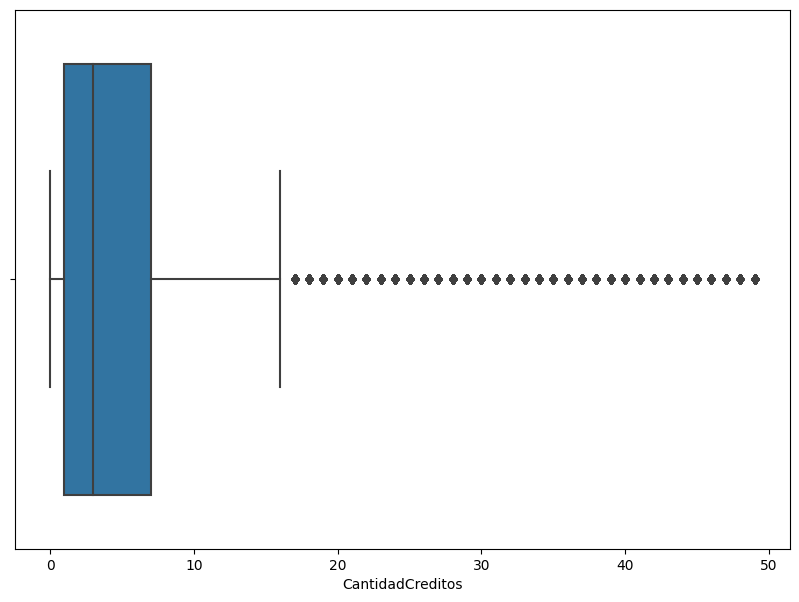

In [ ]:
fig = plt.figure(figsize =(10, 7))
sns.boxplot(x=df['CantidadCreditos'])
plt.show()


### situacionBCRA
'situacionBCRA': null / 1 / 2 / 3 / 4 / 5
	null: no figura en BCRA
1: Normal | Atraso en el pago que no supere los 31 días.
2: Riesgo bajo | Atraso en el pago de más de 31 y hasta 90 días desde el vencimiento.
3: Riesgo medio | Atraso en el pago de más de 90 y hasta 180 días.
4: Riesgo alto | Atraso en el pago de más de 180 días hasta un año.
5: Irrecuperable | Atrasos superiores a un año.
(Está afectado en un boletín de deudores externos a la empresa. Que figure, implica que tiene deuda con alguna entidad financiera, en general, bancarizados)


In [ ]:
df['situacionBCRA'].info()

<class 'pandas.core.series.Series'>
Int64Index: 215549 entries, 0 to 220958
Series name: situacionBCRA
Non-Null Count   Dtype  
--------------   -----  
156822 non-null  float64
dtypes: float64(1)
memory usage: 3.3 MB


In [ ]:
df['situacionBCRA'].describe()

count    156822.000000
mean          2.120602
std           1.589260
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max           5.000000
Name: situacionBCRA, dtype: float64

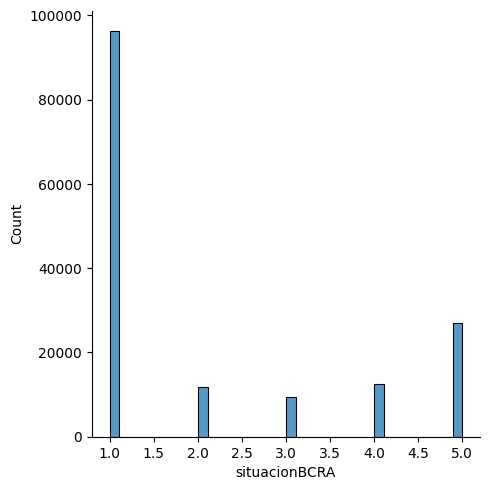

In [ ]:
sns.displot(df,x='situacionBCRA',kind='hist')

### que tipo cuantos clientes son de la categoria H del monotributo.

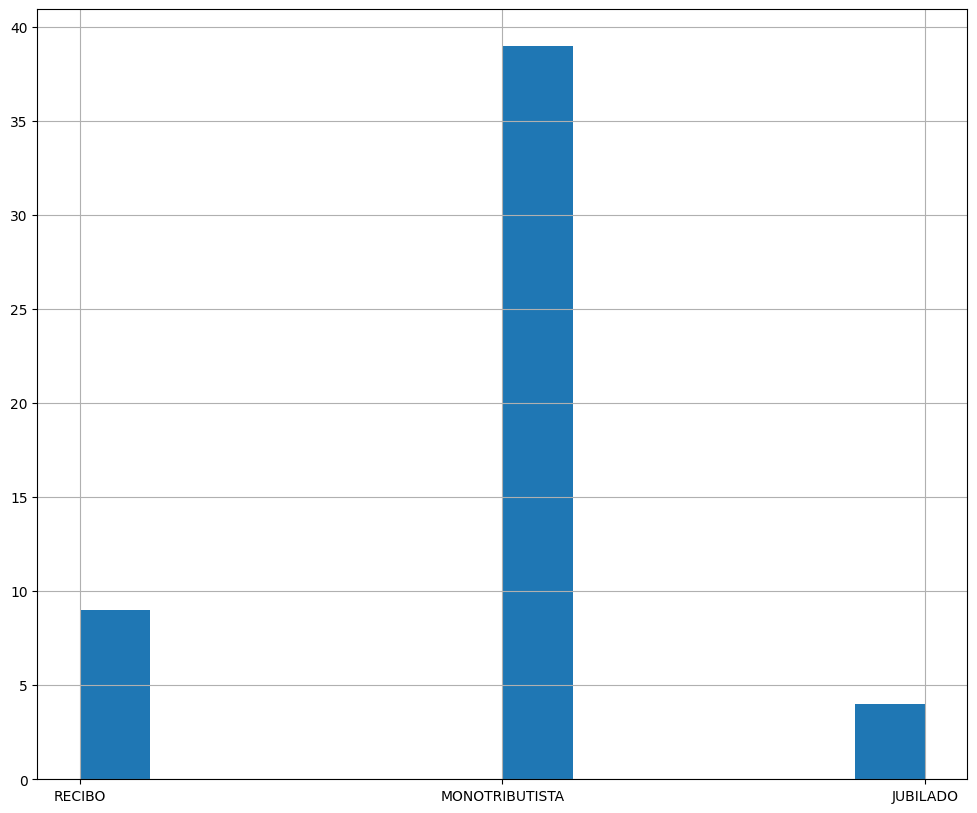

In [ ]:
df[df['monotributo']=='H']['categoria'] .hist(bins=12, figsize=(12,10))
plt.show()

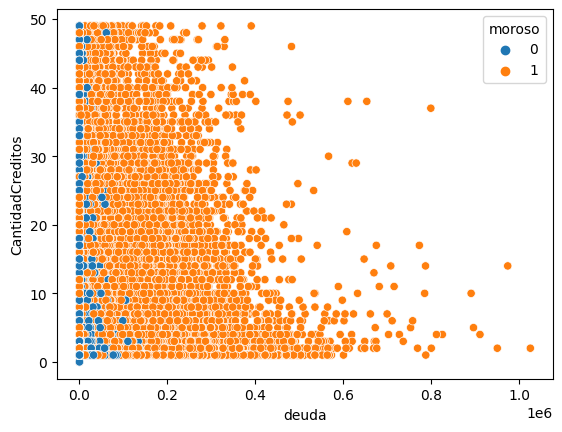

In [ ]:
sns.scatterplot(data=df, x='deuda', y='CantidadCreditos',hue='moroso')
plt.show()

### de los clientes morosos compara la cantidad de creditos vs. los que figuran en boletin

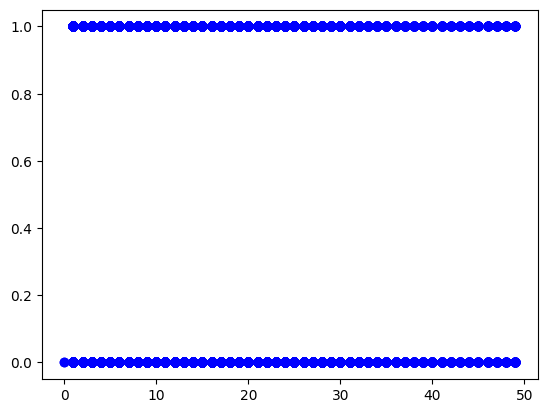

In [ ]:
MorososEnBoletin=df[df['moroso']==1]
plt.scatter(MorososEnBoletin['CantidadCreditos'], MorososEnBoletin['figuraEnBoletin'], c ="blue")
plt.show()

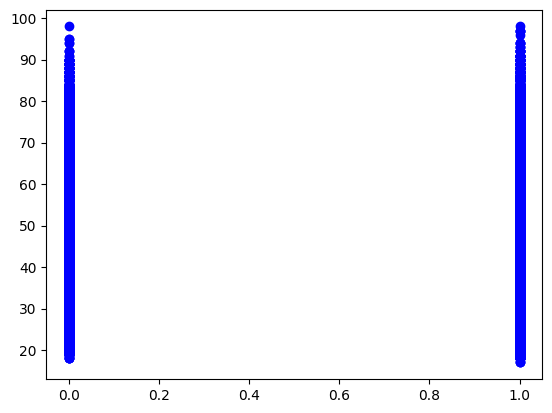

In [ ]:
# MorososEnBoletin=df[df['moroso']==1]
plt.scatter(df['moroso'], df['edad'], c ="blue")
plt.show()

### Compara la frecuencia situacionBCRA de morosos vs. No Morosos.

In [ ]:
frecuencia_situacionBCRA_morosos = MorososEnBoletin['situacionBCRA'].value_counts()
frecuencia_situacionBCRA_morosos

5.0    26987
1.0    18483
4.0    12454
2.0    11709
3.0     9358
Name: situacionBCRA, dtype: int64

In [ ]:
situacionesBCRA=df[df['situacionBCRA'].notna()]['situacionBCRA'].unique()
situacionesBCRA

array([1., 5., 3., 2., 4.])

In [ ]:
frecuencia_situacionBCRA_nomorosos = df[df['moroso']==0]['situacionBCRA'].value_counts()
frecuencia_situacionBCRA_nomorosos

1.0    77831
Name: situacionBCRA, dtype: int64

ValueError: ignored

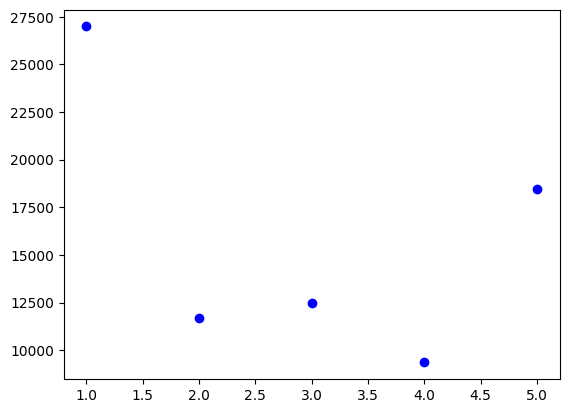

In [ ]:
plt.scatter(situacionesBCRA, frecuencia_situacionBCRA_morosos, c ="blue")
plt.scatter(situacionesBCRA, frecuencia_situacionBCRA_nomorosos, c ="red")
plt.show()

### muestra un grafico sobre la relacion de los campos y sus datos (todos).

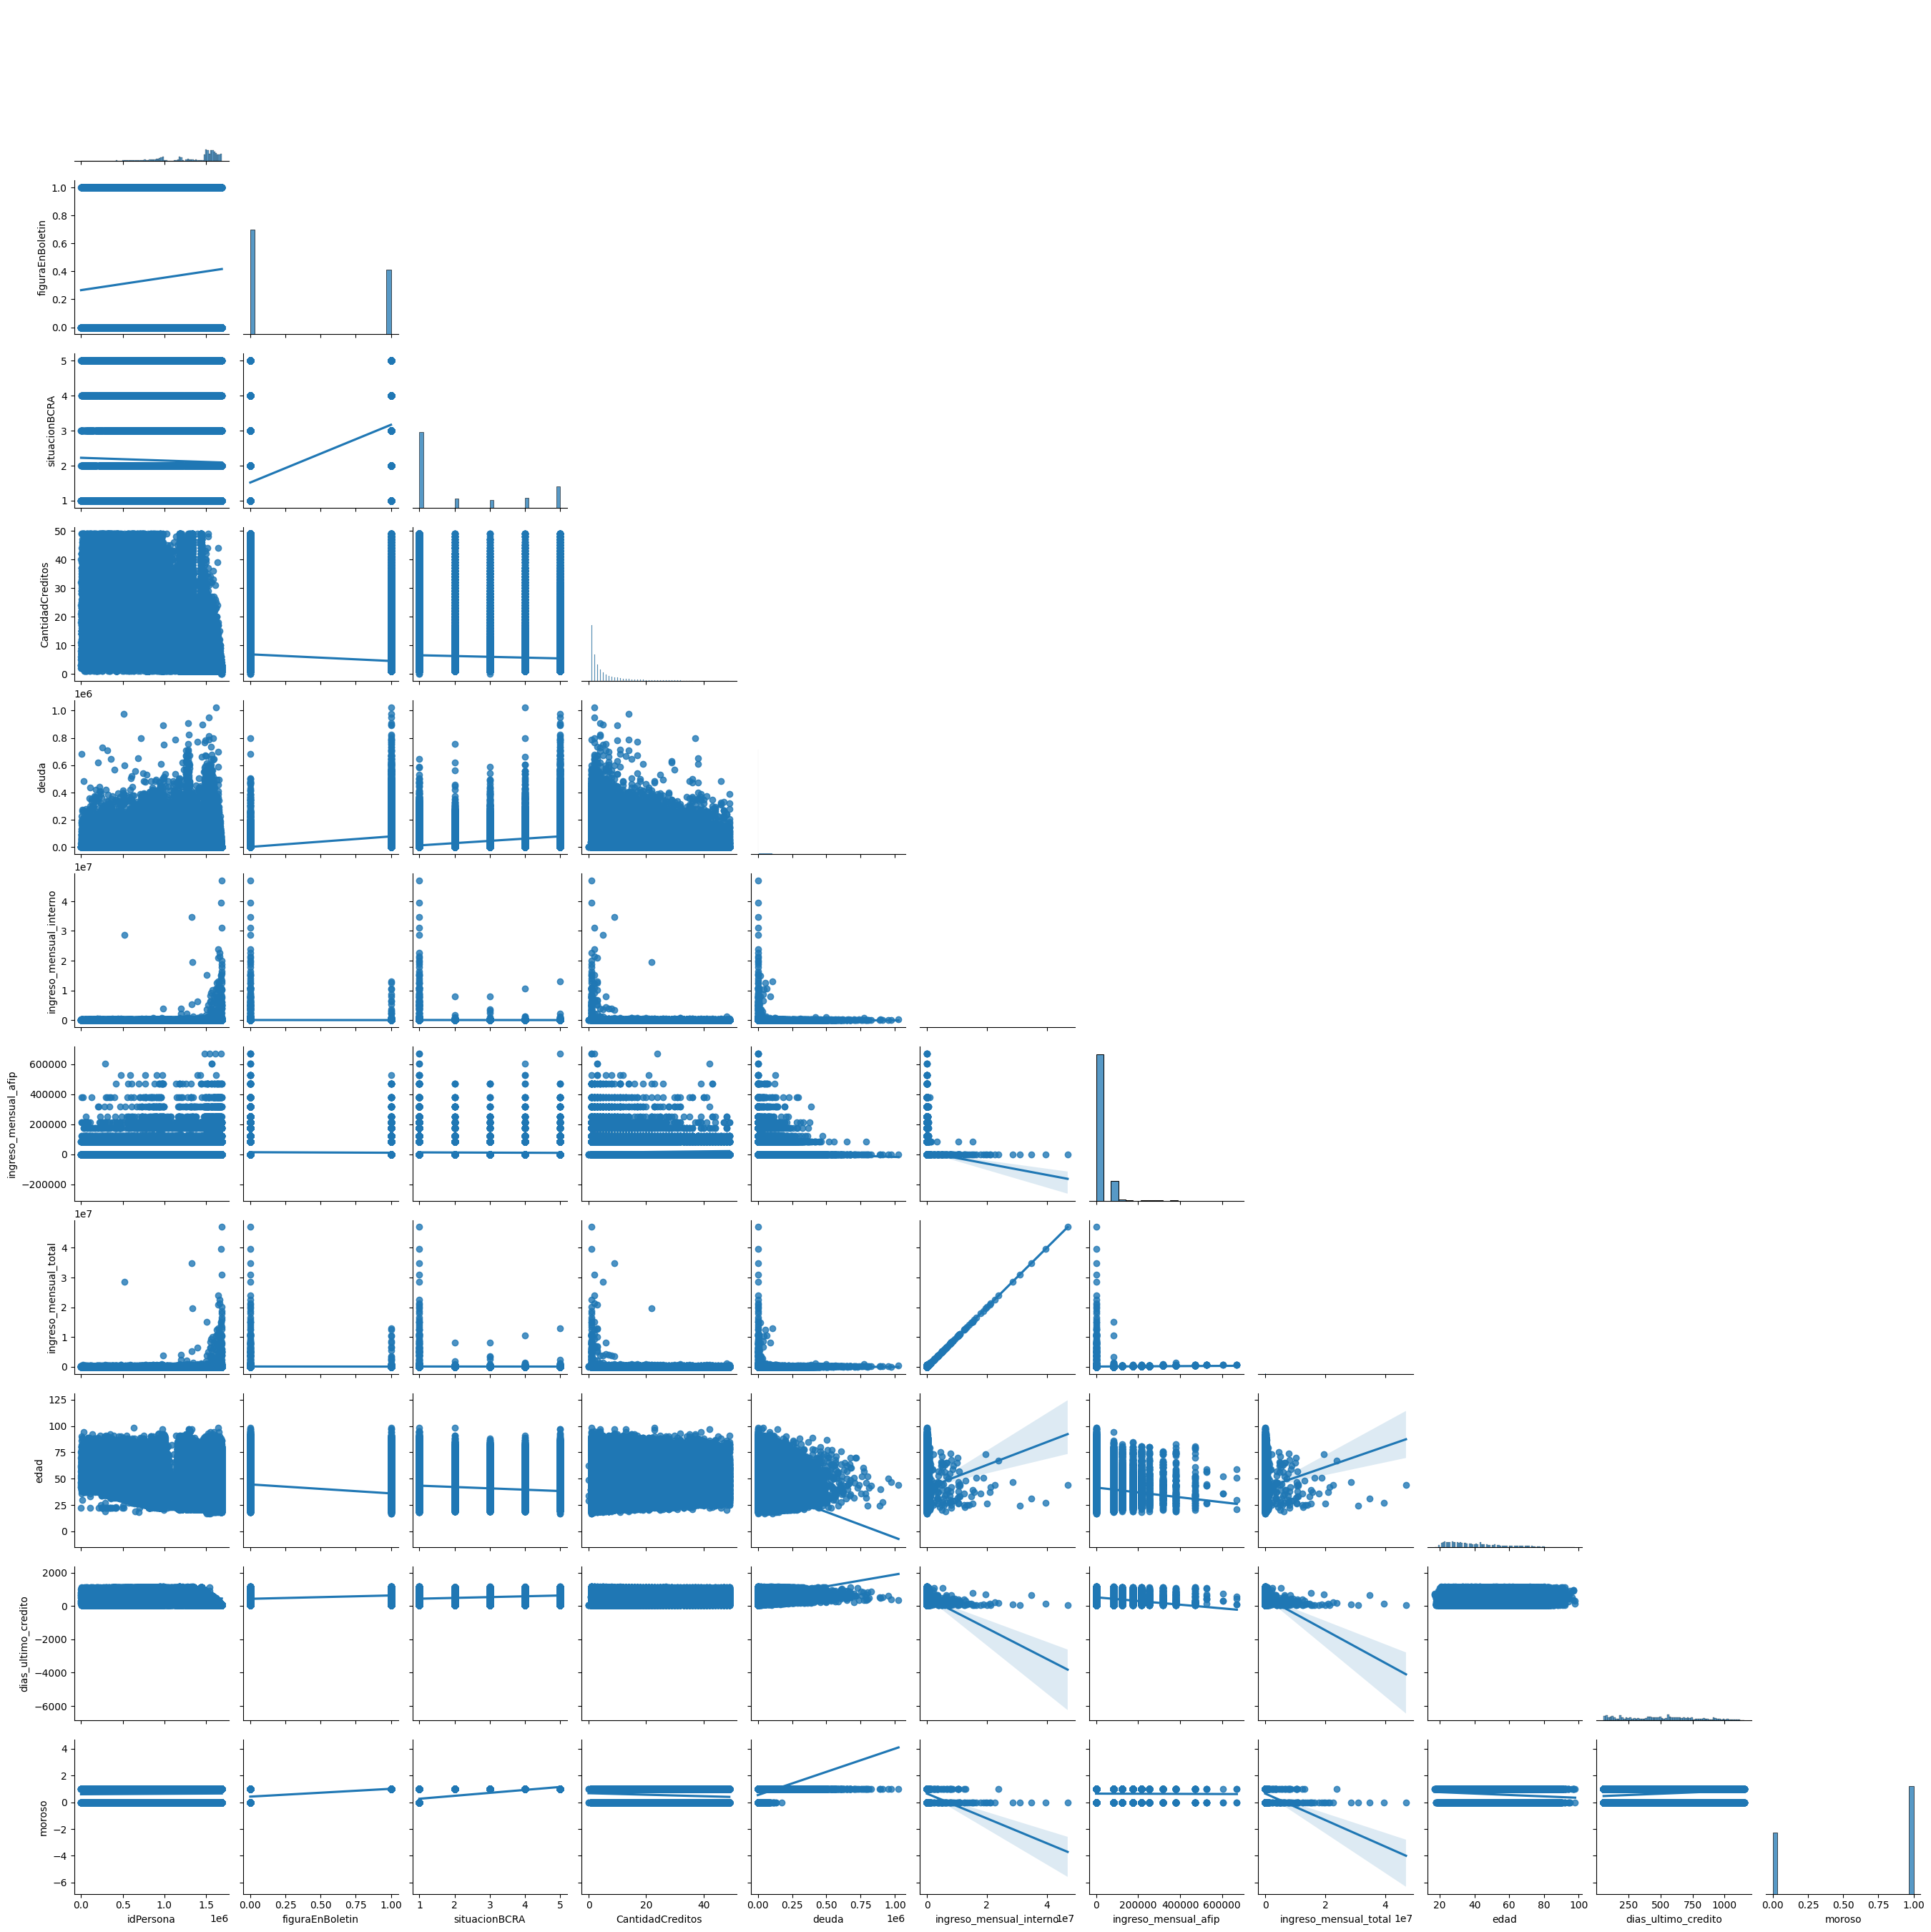

In [ ]:
sns.pairplot(df,kind='reg',corner=True)
plt.show()

### exporta el csv con datos de mora.

In [ ]:
df.to_csv('/content/drive/MyDrive/pin-ds2023/dato_curso_con_mora.csv', index=False)